In [2]:
pip install gym

     |████████████████████████████████| 1.6 MB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 7.7 MB/s eta 0:00:01
  Created wheel for gym: filename=gym-0.18.3-py3-none-any.whl size=1657514 sha256=28251dd18f6eb2ac9f69271d86f8985731e1fed2aa23522750e629239ffcec37
  Stored in directory: /Users/u14506394/Library/Caches/pip/wheels/1a/ec/6d/705d53925f481ab70fd48ec7728558745eeae14dfda3b49c99
Successfully built gym
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

## Load GYM environment

In [6]:
env = gym.make('FrozenLake-v0', is_slippery=False)

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))

States: 16
Actions: 4


## Settings

In [40]:
lr = 0.8
gamma = 0.95

NUM_EPISODES = 3000
MAX_STEPS = 100
REWARD_AVERAGE_WINDOW = 20

##  Q-Table initialization

In [41]:
Q = np.zeros([NUM_STATES, NUM_ACTIONS])

pathLenList = []
totalRewardList = []
totalRewardAverageList = []
pathLenAverageList = []

##  Q-Table learning

In [47]:
Q = np.zeros([NUM_STATES, NUM_ACTIONS])

pathLenList = []
totalRewardList = []
totalRewardAverageList = []
pathLenAverageList = []


for i in range(NUM_EPISODES):
#     print (f'eps:{eps}')
    
    eps = 1.0 - (float(i) / NUM_EPISODES)
#     eps = 1

    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
        
        if np.random.rand() < eps:
            a = env.action_space.sample()
        else:
            
            a = np.argmax(Q[s,:])
        
        s1, r, done, _ = env.step(a)
        
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    
    if i % REWARD_AVERAGE_WINDOW == 0 and i >= REWARD_AVERAGE_WINDOW:
        totalRewardAverage = np.mean(totalRewardList[-REWARD_AVERAGE_WINDOW:])
        totalRewardAverageList.append(totalRewardAverage)
        
        pathLenAverage = np.mean(pathLenList[-REWARD_AVERAGE_WINDOW:])
        pathLenAverageList.append(pathLenAverage)
        
        if i % 100 == 0:
            print('Episode {}: average total reward = {} pathLen = {}'.format(i, totalRewardAverage, pathLenAverage))

Episode 100: average total reward = 0.0 pathLen = 5.8
Episode 200: average total reward = 0.05 pathLen = 8.25
Episode 300: average total reward = 0.0 pathLen = 7.75
Episode 400: average total reward = 0.05 pathLen = 6.5
Episode 500: average total reward = 0.15 pathLen = 8.3
Episode 600: average total reward = 0.0 pathLen = 8.35
Episode 700: average total reward = 0.15 pathLen = 6.7
Episode 800: average total reward = 0.25 pathLen = 7.65
Episode 900: average total reward = 0.2 pathLen = 6.95
Episode 1000: average total reward = 0.3 pathLen = 7.7
Episode 1100: average total reward = 0.15 pathLen = 6.2
Episode 1200: average total reward = 0.0 pathLen = 6.65
Episode 1300: average total reward = 0.35 pathLen = 6.15
Episode 1400: average total reward = 0.3 pathLen = 5.9
Episode 1500: average total reward = 0.45 pathLen = 6.35
Episode 1600: average total reward = 0.25 pathLen = 7.25
Episode 1700: average total reward = 0.45 pathLen = 7.0
Episode 1800: average total reward = 0.65 pathLen = 7.3

## Q-Table

In [48]:
print(Q)

[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.77378094 0.77378094]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


## Plot trajectory length over time

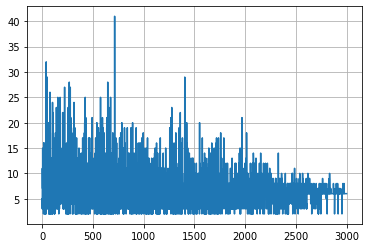

In [49]:
plt.plot(pathLenList)
plt.grid()


## Plot average total reward over time

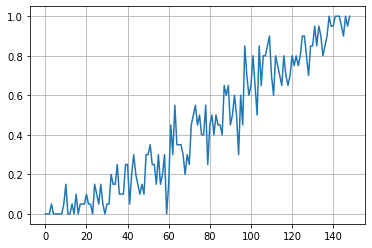

In [50]:
plt.plot(totalRewardAverageList)
plt.grid()

## Run simulation

In [55]:
s

0

In [57]:
USE_Q = True

s = env.reset()

for _ in range(1000):
    env.render()
    if USE_Q:
        a = np.argmax(Q[s,:])
    else:
        a = env.action_space.sample()
    s, r, done, _ = env.step(a)
    if done:
        env.render()
        print('Reward = {}'.format(r))
        break
        
env.close()


SFFF
FHFH
FFFH
HFFG
4
  (Down)
SFFF
FHFH
FFFH
HFFG
8
  (Down)
SFFF
FHFH
FFFH
HFFG
9
  (Right)
SFFF
FHFH
FFFH
HFFG
13
  (Down)
SFFF
FHFH
FFFH
HFFG
14
  (Right)
SFFF
FHFH
FFFH
HFFG
15
  (Right)
SFFF
FHFH
FFFH
HFFG
Reward = 1.0
